In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)
df.head(30)

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11
769,Russia,RUS,1960,3
1028,United States,USA,1960,17
1029,United States,USA,1961,31
770,Russia,RUS,1961,7
1030,United States,USA,1962,55


In [54]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)

pivot_df_100 = pivot_df.divide(pivot_df.sum(axis=1), axis=0)

In [57]:
pivot_df.columns

Index(['RUS', 'USA'], dtype='object', name='Code')

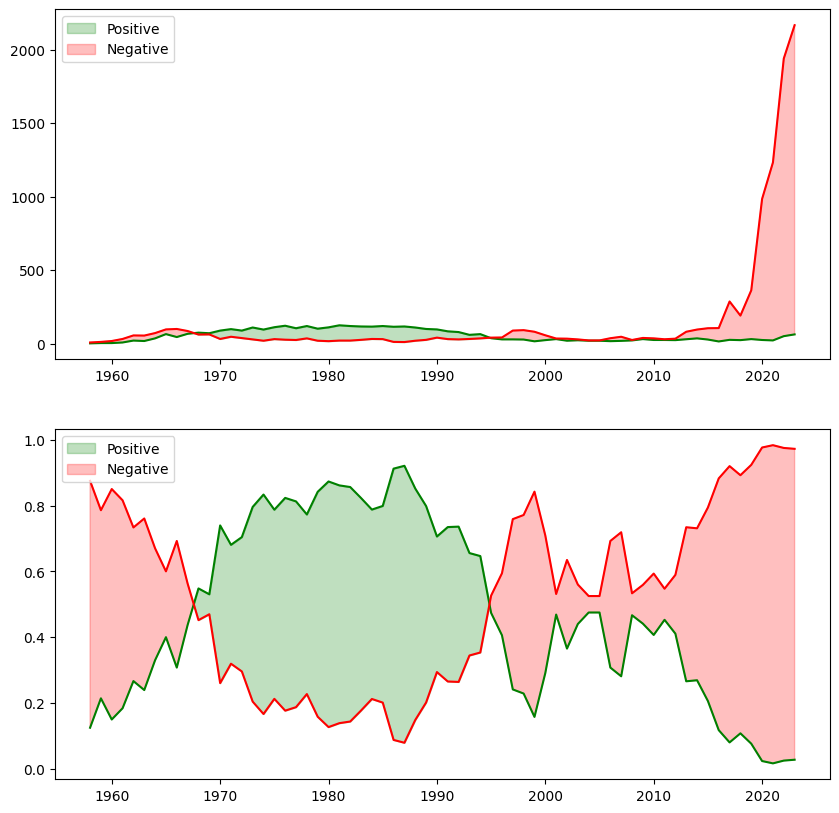

In [62]:
pivot_df

# Initialize figure and axis
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

# Plot lines
axs[0].plot(pivot_df.index, pivot_df['RUS'], color="green")
axs[0].plot(pivot_df.index, pivot_df['USA'], color="red")
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] > pivot_df['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[0].fill_between(
    pivot_df.index, pivot_df['RUS'], pivot_df['USA'], where=(pivot_df['RUS'] <= pivot_df['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[0].legend()

# Plot lines
axs[1].plot(pivot_df_100.index, pivot_df_100['RUS'], color="green")
axs[1].plot(pivot_df_100.index, pivot_df_100['USA'], color="red")
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] > pivot_df_100['USA']), 
    interpolate=True, color="green", alpha=0.25, 
    label="Positive"
)
axs[1].fill_between(
    pivot_df_100.index, pivot_df_100['RUS'], pivot_df_100['USA'], where=(pivot_df_100['RUS'] <= pivot_df_100['USA']), 
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)
axs[1].legend(loc='upper left')

plt.show()

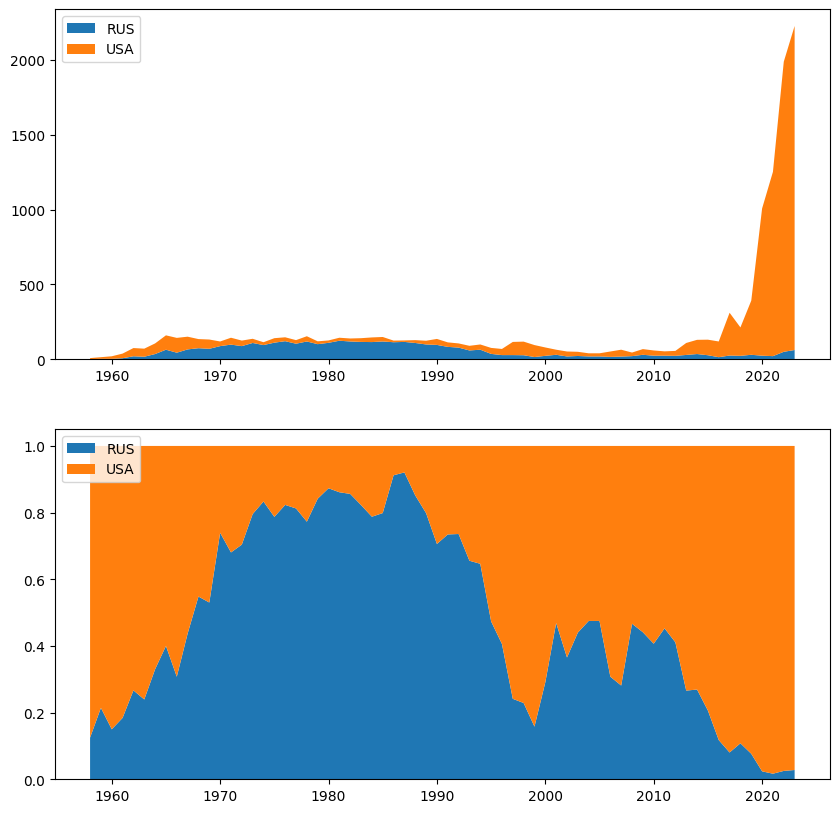

In [55]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

axs[0].stackplot(pivot_df.index,
              pivot_df.values.T,
              labels=pivot_df.columns)
axs[0].legend(loc='upper left')

axs[1].stackplot(pivot_df_100.index,
              pivot_df_100.values.T,
              labels=pivot_df_100.columns)
axs[1].legend(loc='upper left')

plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text

# animation
from PIL import Image, ImageSequence
from matplotlib.animation import FuncAnimation

df = pd.read_csv('outer_space_objects.csv')
df = df[df['Entity']!='World']
df = df[df['Code'].isin(['RUS', 'USA'])]
df.sort_values('Year', inplace=True)

# pivot data
pivot_df = df.pivot(index='Year', columns='Code', values='num_objects')
pivot_df.dropna(inplace=True)
df.head()

,Entity,Code,Year,num_objects
766,Russia,RUS,1957,2
767,Russia,RUS,1958,1
1026,United States,USA,1958,7
768,Russia,RUS,1959,3
1027,United States,USA,1959,11


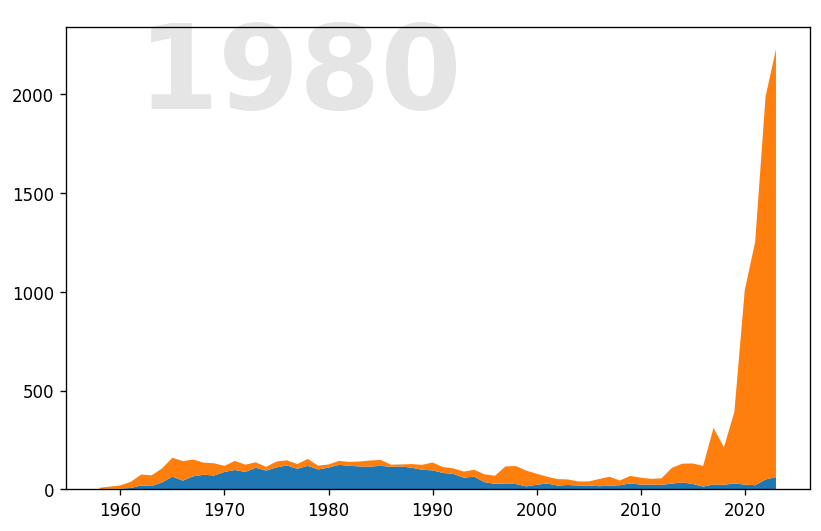

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.stackplot(pivot_df.index,
              pivot_df.values.T,
              labels=pivot_df.columns)

fig_text(
   0.2, 0.8,
   '1980',
   ha='left', va='center',
   fontsize=70,
   fontweight='bold',
   alpha=0.1
)

plt.show()

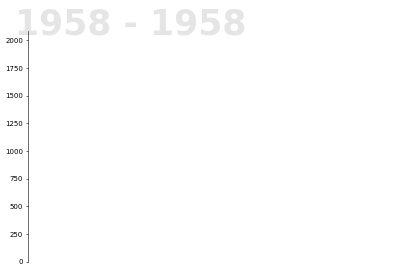

In [87]:
# increase resolution
plt.rcParams['figure.dpi'] = 50
plt.rcParams['savefig.dpi'] = 50

# Figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# parameters
delay_years = 5
initial_duration = 100  
highlight_duration = 1500

# dates to highlight
start_date = 1958
end_date = 2023
first_human_spaceflight = 1961
us_moon_landing = 1969
first_space_station = 1971
hubble_launch = 1990
dates_highlight = [
    first_human_spaceflight + delay_years,
    us_moon_landing + delay_years,
    first_space_station + delay_years,
    hubble_launch + delay_years
]

def update(frame):
    ax.clear()
    subset_df = pivot_df.iloc[:frame]
    ax.stackplot(
        subset_df.index, subset_df.values.T,
        colors=['#2a9d8f', '#e76f51']
    )
    ax.spines[['right', 'top', 'bottom']].set_visible(False)
    ax.set_xticks([])
    #ax.set_axis_off()

    # year annotation
    year = str(pivot_df.index[frame])
    fig_text(
        0.1, 0.9,
        '1958 - ' + year,
        ha='left', va='center',
        fontsize=50,
        fontweight='bold',
        alpha=0.1,
        fig=fig
    )

    # first human spaceflight annotation
    if int(year) == first_human_spaceflight + delay_years:
        ax_text(
            1960, 100,
            'First Human (Yuri Gagarin)\nSpaceflight in 1961',
            fontsize=20,
            color='black',
            fontweight='bold',
            ax=ax
        )
    if int(year) >= first_human_spaceflight + delay_years:
        df_first_human_spaceflight = pivot_df.loc[first_human_spaceflight]
        total_objects_thisyear = df_first_human_spaceflight['RUS'] + df_first_human_spaceflight['USA']
        ax.plot((first_human_spaceflight, first_human_spaceflight), (0, total_objects_thisyear), color='black')
        ax.scatter(first_human_spaceflight, total_objects_thisyear, color='black', s=100, zorder=10)


    # moon landing annotation
    if int(year) == us_moon_landing + delay_years:
        ax_text(
            1960, 100,
            'US Moon Landing in 1969',
            fontsize=20,
            color='black',
            fontweight='bold',
            ax=ax
        )
    if int(year) >= us_moon_landing + delay_years:
        df_moon_landing = pivot_df.loc[us_moon_landing]
        total_objects_thisyear = df_moon_landing['RUS'] + df_moon_landing['USA']
        ax.plot((us_moon_landing, us_moon_landing), (0, total_objects_thisyear), color='black')
        ax.scatter(us_moon_landing, total_objects_thisyear, color='black', s=100, zorder=10)

    # first space station annotation
    if int(year) == first_space_station + delay_years:
        ax_text(
            1960, 100,
            'First Space Station in 1971',
            fontsize=20,
            color='black',
            fontweight='bold',
            ax=ax
        )
    if int(year) >= first_space_station + delay_years:
        df_first_space_station = pivot_df.loc[first_space_station]
        total_objects_thisyear = df_first_space_station['RUS'] + df_first_space_station['USA']
        ax.plot((first_space_station, first_space_station), (0, total_objects_thisyear), color='black')
        ax.scatter(first_space_station, total_objects_thisyear, color='black', s=100, zorder=10)

    # hubble launch annotation
    if int(year) == hubble_launch + delay_years:
        ax_text(
            1960, 100,
            'Hubble Launch in 1990',
            fontsize=20,
            color='black',
            fontweight='bold',
            ax=ax
        )
    if int(year) >= hubble_launch + delay_years:
        df_hubble_launch = pivot_df.loc[hubble_launch]
        total_objects_thisyear = df_hubble_launch['RUS'] + df_hubble_launch['USA']
        ax.plot((hubble_launch, hubble_launch), (0, total_objects_thisyear), color='black')
        ax.scatter(hubble_launch, total_objects_thisyear, color='black', s=100, zorder=10)
        

    return ax

# Creating the animation
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(pivot_df),
    interval=200, # in ms
    cache_frame_data=False
)
ani.save('animation.gif', writer='imagemagick', fps=10)


# get initial frames
with Image.open('animation.gif') as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration

    # highlight dates
    if pivot_df.index[i] in dates_highlight:
        frame_duration = highlight_duration
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save('modified_animation.gif', save_all=True, append_images=frames[1:], loop=0)
